# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
import os
pf.__version__

'0.0.58'

## Specifying filetype, and folder as before

In [3]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False


MasterFolder=r"C:\Users\charl\Documents\Instruments and calibrations"
DayFolder=MasterFolder + "/UCB_5-10-23"

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')
if not os.path.exists(MasterFolder + '\OUTPUT'+'\Pickles'):
    os.mkdir(MasterFolder + '\OUTPUT'+'\Pickles')

if not os.path.exists(DayFolder + '\GROUPS'):
    os.mkdir(DayFolder +'\GROUPS')

if not os.path.exists(DayFolder + '\FITOUT'):
    os.mkdir(DayFolder +'\FITOUT')


meta_path=DayFolder +  '\METADATA'
spectra_path=DayFolder + '\SPECTRA'

output_path=MasterFolder +"\OUTPUT"
fitout_path=DayFolder+'\FITOUT'
group_path=DayFolder+'\GROUPS'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [4]:
## load dataframes and numpy arrays 
np_x = joblib.load(group_path+'/'+'np_x.sav')

# What group do you want to fit?
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load(group_path+'/'+'Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load(group_path+'/'+'Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load(group_path+'/'+'Strong_df.sav')
GroupN_df

,filename,rays_present,approx_split,Diad1_pos,Diad2_pos,HB1_pos,HB2_pos,C13_pos,Diad1_abs_prom,Diad2_abs_prom,...,HB2_height,C13_height,Diad1_height,HB1_height,Diad1_Median_Bck,Diad2_Median_Bck,C13_HB2_abs_prom_ratio,Diad2_HB2_Valley_prom,HB1_prom/std_betweendiads,HB2_prom/std_betweendiads
0,02 C1.txt,False,103.376291,1285.518822,1388.895112,1265.291232,1410.250123,1370.570390,4065.457884,7048.725976,...,1189.633288,829.007897,4756.757871,949.790340,691.299988,692.249985,4.518922,1.020473,58.166936,108.497475
1,03 C2_CRR_DiadFit.txt,True,103.376291,1285.518822,1388.895112,1265.252735,1410.266622,1370.570390,4063.460760,7077.817438,...,1187.142901,821.551512,4754.060766,949.137646,690.600006,691.749985,4.886889,1.020809,59.818310,111.138157
2,05 C3.txt,False,103.431287,1285.326335,1388.757622,1265.142743,1410.217125,1370.493395,4070.025254,7415.514647,...,1199.915358,845.585252,4762.525254,964.799254,692.500000,693.812500,4.215604,1.029465,66.897640,120.612531
3,06 C4.txt,False,103.431287,1285.315336,1388.746622,1265.153742,1410.206126,1370.509894,4091.386271,7466.372715,...,1204.432448,841.379448,4784.136271,954.152284,692.750000,694.000000,4.370647,1.025687,57.003529,107.646153
4,07 C5.txt,False,103.447786,1285.287838,1388.735623,1265.054749,1410.178628,1370.531893,4074.832174,7488.764399,...,1190.280520,846.745314,4767.582174,961.674781,692.750000,694.062500,4.064878,1.030478,62.225695,111.362829
5,10 C6.txt,False,103.530280,1285.056854,1388.587134,1264.801766,1410.063136,1370.449398,4716.724451,9082.799281,...,1267.375697,901.013051,5416.724451,983.151690,700.000000,701.687500,3.632268,1.044263,59.812260,114.906130
6,11 C7.txt,False,103.530280,1285.051354,1388.581634,1264.906259,1410.046637,1370.460398,4795.328604,9269.922018,...,1264.332379,893.434669,5494.328604,1006.698119,699.000000,701.187500,3.729287,1.044144,62.592328,110.745965
7,12 C8.txt,False,103.530280,1285.045854,1388.576134,1264.955756,1409.980642,1370.454898,4806.978093,9377.731274,...,1267.531866,900.929703,5505.978093,1005.451263,699.000000,701.375000,3.581245,1.045141,59.702613,106.548932
8,14 C9_CRR_DiadFit.txt,True,103.541279,1285.029356,1388.570635,1264.895260,1410.013639,1370.410901,4583.982201,8935.876347,...,1243.663504,893.019008,5283.982201,983.051352,700.000000,701.750000,3.667551,1.045640,64.676640,119.278762
9,15 C10_CRR_DiadFit.txt,True,103.563277,1284.990858,1388.554136,1264.867762,1410.002640,1370.427400,4957.569341,9794.887541,...,1300.874902,904.148663,5658.069341,1009.935056,700.500000,702.875000,3.930306,1.057072,76.566701,142.482169


### Now load one file from this group to tweak parameters for

In [5]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'02 C1.txt'

### Lets plot the diad to have a look at it

02 C1.txt


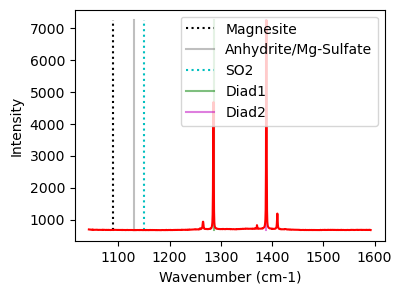

In [6]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [7]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [8]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1330, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=4065.4578836745313, HB_prom=274.99035195427405, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

,Diad1_Combofit_Cent,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,HB1_Cent,HB1_Area,HB1_Sigma,Diad1_Combofit_Height,Diad1_Residual,Diad1_Prop_Lor,Diad1_fwhm,Diad1_refit
0,1285.469804,1285.469854,7025.977539,0.63038,None,1265.241857,737.320742,0.89248,4163.271742,5.933423,0.635564,1.260761,Flagged Warnings:


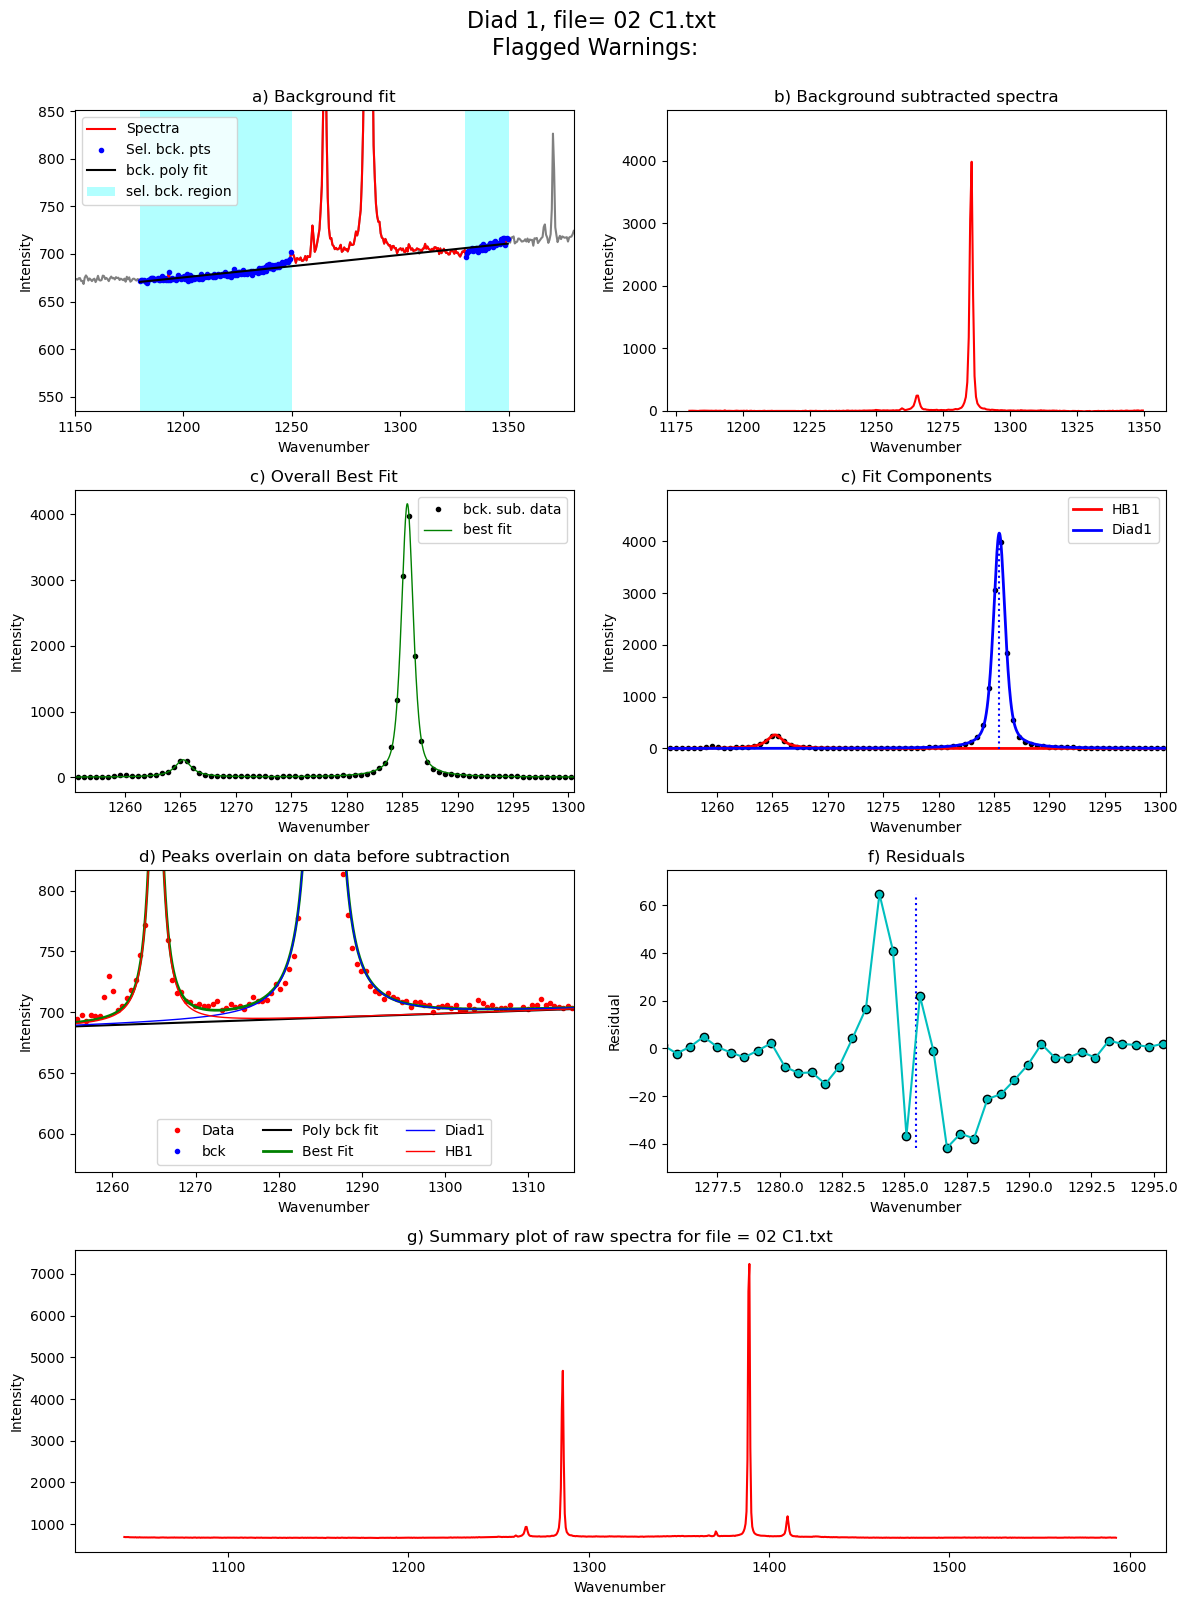

In [9]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [10]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [11]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1350, 1365), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3,
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=1000, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=7048.725976271181, HB_prom=512.9333064235061, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=113.50789717928706)

### See what these fit parameters look like for diad2

,Diad2_Combofit_Cent,Diad2_Voigt_Cent,Diad2_Voigt_Area,Diad2_Voigt_Sigma,Diad2_Voigt_Gamma,HB2_Cent,HB2_Area,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma,Diad2_Combofit_Height,Diad2_Residual,Diad2_Prop_Lor,Diad2_fwhm,Diad2_refit
0,1388.86081,1388.86076,10598.942123,0.531412,None,1410.22671,1048.152698,0.744694,1370.695109,164.004518,0.265285,7573.513173,6.230592,0.594551,1.062824,Flagged Warnings:


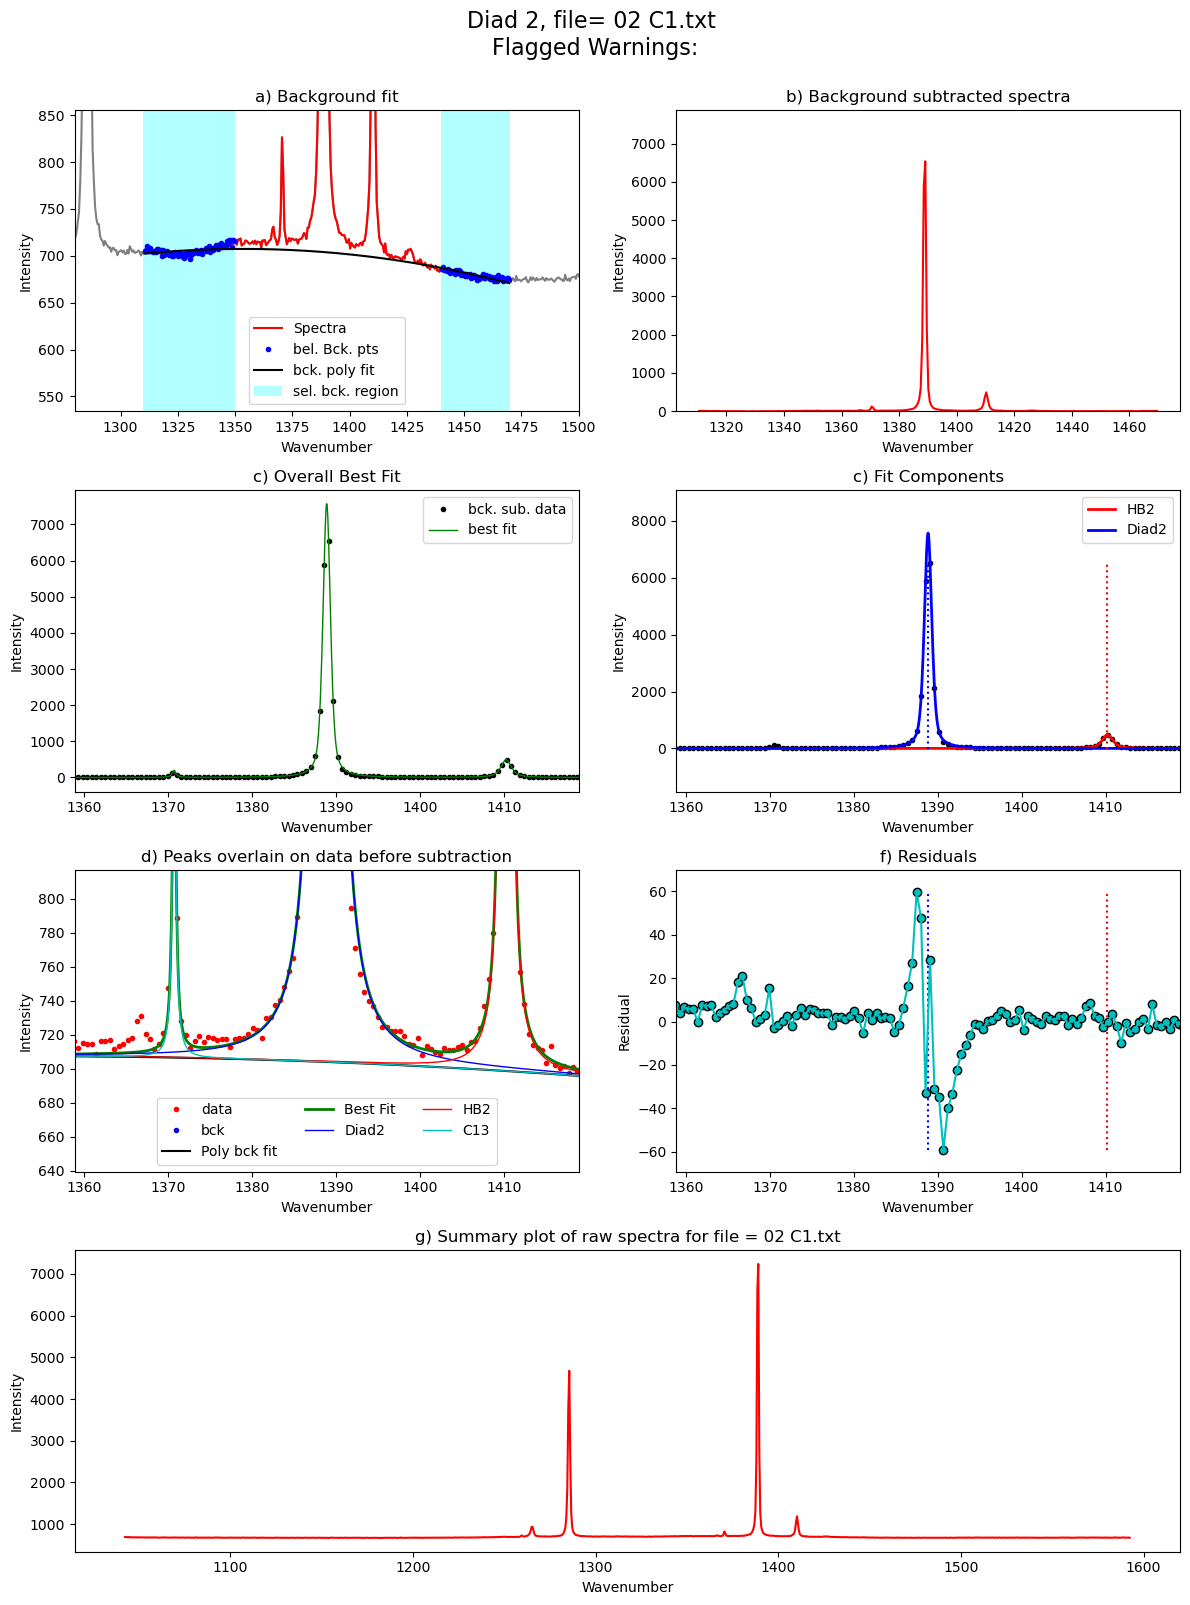

In [12]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

### Update the sigma

In [13]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.5314119274847556


## Loop over all the files in the group
- This will loop over all the 

In [14]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_abs_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


 45%|████▌     | 10/22 [00:34<00:37,  3.16s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:2797: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
 68%|██████▊   | 15/22 [00:50<00:21,  3.13s/it]

### Get file names that flagged a warning

In [14]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

0
Series([], Name: filename, dtype: object)


### Have a look at different parameters
- This can help you spot really bad fits

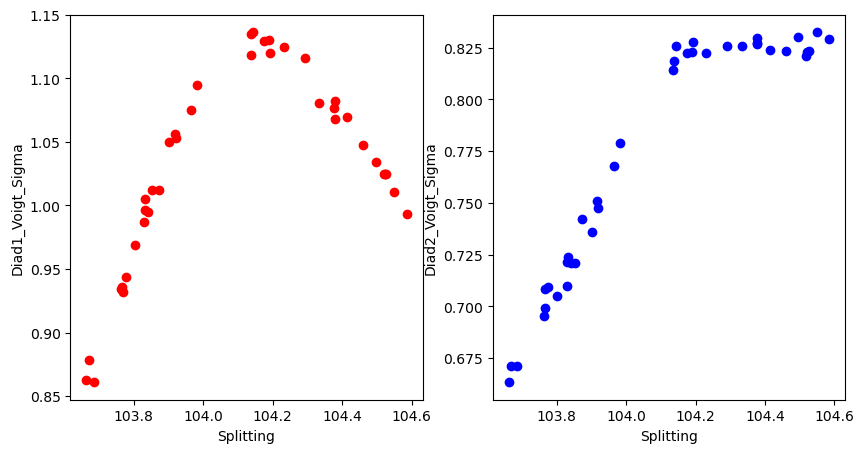

In [15]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

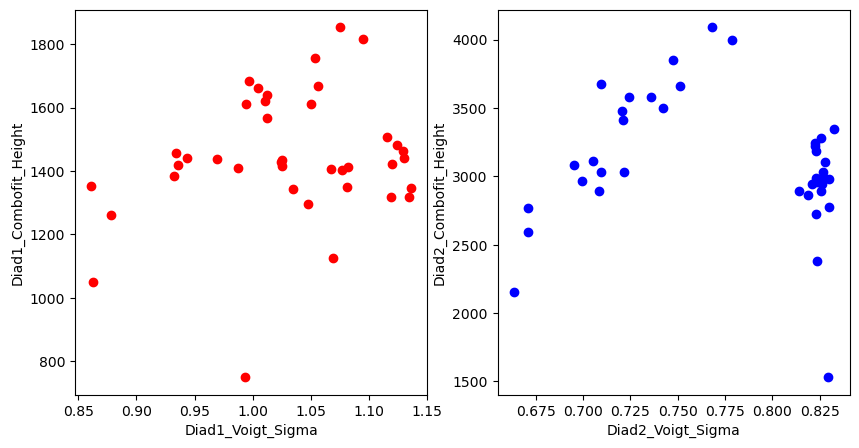

In [16]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [17]:
## Save parameters to excel

In [18]:
combo=df_Merge

nm=os.path.basename(DayFolder)
model_short=''.join(char for char in model_name if char.isupper()) # this extracts the capital letters from the model name, example: PseudoVoigtModel=PVM

if batch=='Weak':
    combo.to_excel(fitout_path+'/'+'Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel(fitout_path+'/'+'Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel(fitout_path+'/'+'Strong_Diads.xlsx')
#fitout_path+'/'+nm+"_"+model_short+'_'+